In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.plugin_event_accumulator import EventAccumulator
import glob
import re
import numpy as np

In [63]:
# income
model_date = '2022-07-14/14-41-19'
data_name = 'income'
# # mnist
# model_date = '2022-07-13/18-58-29'
# data_name = 'mnist'
# # blog
# model_date = '2022-07-13/19-01-02'
# data_name = 'blog'

num_path = 10

In [64]:
result_root = f'outputs/multirun/main/supervised/{data_name}/model/{model_date}/'
model_root = f'outputs/multirun/main/supervised/{data_name}/model/{model_date}/**/events*'

In [67]:
def get_results(root):
    path = glob.glob(root)
    path = sorted(path, key=lambda s: int(re.findall(r'\d+', s)[6]))
    num_hypara = len(path) // 10
    results = [[] for _ in range(num_hypara)]
    for i in range(num_hypara):
        for j in range(10):
            ea = EventAccumulator(path[i * 10 + j])
            ea.Reload()
            # acc
            tag = ea.Tags()['tensors'][-1]
            for t in ea.Tensors(tag):
                results[i].append(t.tensor_proto.float_val[0])
    return np.array(results)


In [68]:
r = get_results(model_root)


In [70]:
x = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

In [77]:
me = r.mean(axis=1)
std = r.std(axis=1)
std

array([0.13661268, 0.09143988, 0.07819954, 0.08341347, 0.08643857,
       0.08638675])

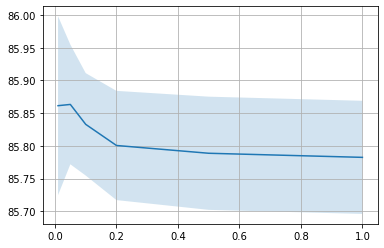

In [81]:
plt.plot(x, me)
plt.fill_between(x, me+std, me-std, alpha=0.2)
plt.grid()